<a href="https://colab.research.google.com/github/shahnoorraza/Phishing-URLs-Detection-Using-Deep-Learning-Models/blob/main/Evaluation_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import string
import gensim
from gensim.models import KeyedVectors
from gensim.models import FastText
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, Bidirectional, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape, Flatten, Concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from keras.models import model_from_json
import pickle
import json
import logging
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.15.1
!pip install keras==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully unin

ERROR: Operation cancelled by user
^C


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of data_url.csv')
df.head(5)

/tmp/ipython-input-4-3991716362.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of data_url.csv')


,Label,URL,Unnamed: 2
0,legitimate,https://oregonstateparks.org/index.cfm?do=geti...,NaN
1,phishing,http://business.hsbc.com.camaract.mobi/system_...,NaN
2,phishing,http://facebook.com-source-page.com/help/conta...,NaN
3,legitimate,http://michaelnielsen.org/blog/lecture-course-...,NaN
4,phishing,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...,NaN


In [ ]:
urldata = df.drop('Unnamed: 2', axis=1)
urldata.head(5)
urldata.shape

(520285, 2)

In [ ]:
urldata.isnull().sum()

,0
Label,0
URL,0


In [ ]:
duplicates = urldata[urldata.duplicated(subset='URL')]
print("Number of duplicate URLs:", duplicates.shape[0])
print(duplicates)

Number of duplicate URLs: 502
           Label                                                URL
3355    phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
6166    phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
8617    phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
14870   phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
15666   phishing  http://fb-com.es.vu/?amp;amp;amp;amp;amp;amp;a...
...          ...                                                ...
517943  phishing  http://paypal-com.us.webscrlcmdl.login.submit....
518090  phishing  http://eday.stickersmakeyoufaster.com/2b9bce9f...
518869  phishing  http://41.241.52.234/~andy/.secure/united.stat...
519639  phishing  http://www.bjcurio.com/js/index.htm?amp;app=co...
520081  phishing  http://justsomefacts.com/wp-content/themes/Nic...

[502 rows x 2 columns]


In [ ]:
df_no_duplicates_url = urldata.drop_duplicates(subset='URL')
print("Shape of DataFrame after removing duplicate URLs:", df_no_duplicates_url.shape)
df_no_duplicates_url.info()

Shape of DataFrame after removing duplicate URLs: (519783, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 519783 entries, 0 to 520284
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   519783 non-null  object
 1   URL     519783 non-null  object
dtypes: object(2)
memory usage: 11.9+ MB


In [ ]:
print(df_no_duplicates_url['Label'].value_counts())

Label
legitimate    288195
phishing      231588
Name: count, dtype: int64


In [ ]:
#Converting target variable into numerical form
lb = LabelEncoder()
#coding legitimate as 0 and phishing as 1
df_no_duplicates_url['Label']= lb.fit_transform(df_no_duplicates_url['Label'])
lb = LabelEncoder()
df_no_duplicates_url.head()

/tmp/ipython-input-10-1086639724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates_url['Label']= lb.fit_transform(df_no_duplicates_url['Label'])


,Label,URL
0,0,https://oregonstateparks.org/index.cfm?do=geti...
1,1,http://business.hsbc.com.camaract.mobi/system_...
2,1,http://facebook.com-source-page.com/help/conta...
3,0,http://michaelnielsen.org/blog/lecture-course-...
4,1,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...


In [ ]:
df_0 = df_no_duplicates_url[df_no_duplicates_url['Label'] == 0]
df_1 = df_no_duplicates_url[df_no_duplicates_url['Label'] == 1]

df_1 = df_1.sample(n= 230000, random_state = 42)
df_0 = df_0.sample(n= 230000, random_state = 42)

In [ ]:
urldata1 = pd.concat([df_0, df_1], ignore_index = True)
urldata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460000 entries, 0 to 459999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   460000 non-null  int64 
 1   URL     460000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [ ]:
# Preprocessing Stage - Lowercasing all URLs
urldata1['URL'] = urldata1['URL'].str.lower()
urldata1.head(5)

,Label,URL
0,0,https://www.survio.com/survey/d/q6k0h2k4k0v5a8l5a
1,0,http://younoodle.com/people/kate_klingensmith
2,0,https://www.techradar.com/sg/reviews/lg-gram-13
3,0,https://regionsyddanmark.dk/wm506697
4,0,https://www.absolventa.de/jobs/channel/ingenie...


In [ ]:
def tokenize_url(url):
    tokens = re.split(r'([.?/\-_=%&@+;])', url)  # Keep the delimiters as tokens
    tokens = [token for token in tokens if token.strip()]  # Remove empty tokens
    return tokens
urldata1['text_tokenized'] = urldata1['URL'].apply(tokenize_url)
print(urldata1[['URL', 'text_tokenized']].head(5))

                                                 URL  \
0  https://www.survio.com/survey/d/q6k0h2k4k0v5a8l5a   
1      http://younoodle.com/people/kate_klingensmith   
2    https://www.techradar.com/sg/reviews/lg-gram-13   
3               https://regionsyddanmark.dk/wm506697   
4  https://www.absolventa.de/jobs/channel/ingenie...   

                                      text_tokenized  
0  [https:, /, /, www, ., survio, ., com, /, surv...  
1  [http:, /, /, younoodle, ., com, /, people, /,...  
2  [https:, /, /, www, ., techradar, ., com, /, s...  
3  [https:, /, /, regionsyddanmark, ., dk, /, wm5...  
4  [https:, /, /, www, ., absolventa, ., de, /, j...  


In [ ]:
# Setting Vocabulary Size to All Words in the Dataset
tokenizer = Tokenizer(filters='')  # Don't filter out any characters
tokenizer.fit_on_texts(urldata1['text_tokenized'])
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 639507


In [ ]:
# Preparing corpus for FastText
corpus = urldata1['text_tokenized'].tolist()

# Word Embedding Using FastText
fasttext_model = FastText(sentences=corpus, vector_size=300, window=5, min_count=5, workers=4)

# Creating an embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[index] = fasttext_model.wv[word]

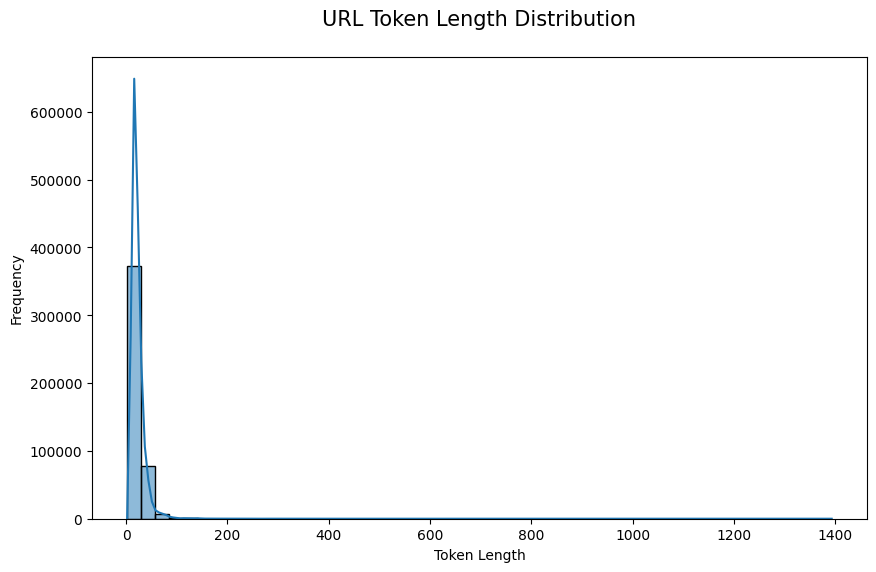

In [ ]:
# Step 7: Plotting URL Length Distribution and Choosing Maximum Length
urldata1['token_length'] = urldata1['text_tokenized'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(urldata1['token_length'], bins=50, kde=True)
plt.title('URL Token Length Distribution\n', fontsize=15)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Converting Tokens to Sequences

sequences = tokenizer.texts_to_sequences(urldata1['text_tokenized'])

In [ ]:
longest = max(len(seq) for seq in sequences)
print("Longest URL size: {}".format(longest))
average = np.mean([len(seq) for seq in sequences])
print("Average URL size: {}".format(average))
stdev = np.std([len(seq) for seq in sequences])
print("Stdev of URL size: {}".format(stdev))
max_len3 = int(average + stdev * 3)
print('Max URL size: {}'.format(max_len3))

Longest URL size: 1393
Average URL size: 22.850995652173914
Stdev of URL size: 15.460572641399189
Max URL size: 69


In [ ]:
#padding Sequences
X = pad_sequences(sequences, maxlen=max_len3, padding='post', truncating='post')

In [ ]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, urldata1['Label'], test_size=0.20, random_state=42, shuffle= True)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
 #Load saved models (replace the paths with your actual model paths)
cnn_model = load_model('/content/drive/MyDrive/models/change_simplecnn13_300_done_model.h5')
lstm_model = load_model('/content/drive/MyDrive/model_03/simple_lstm2.h5')
gru_model = load_model('/content/drive/MyDrive/models/gru_3.h5')
bilstm_model = load_model('/content/drive/MyDrive/models/bilstm_4.h5')
bigru_model = load_model('/content/drive/MyDrive/models/bigru_5.h5')
cnn_lstm_model = load_model('/content/drive/MyDrive/model_03/cnn_lstm_1.h5')
cnn_bilstm_model = load_model('/content/drive/MyDrive/models/cnn_bilstm_6.h5')

In [ ]:
from sklearn.metrics import accuracy_score

2875/2875 [==============================] - 85s 29ms/step


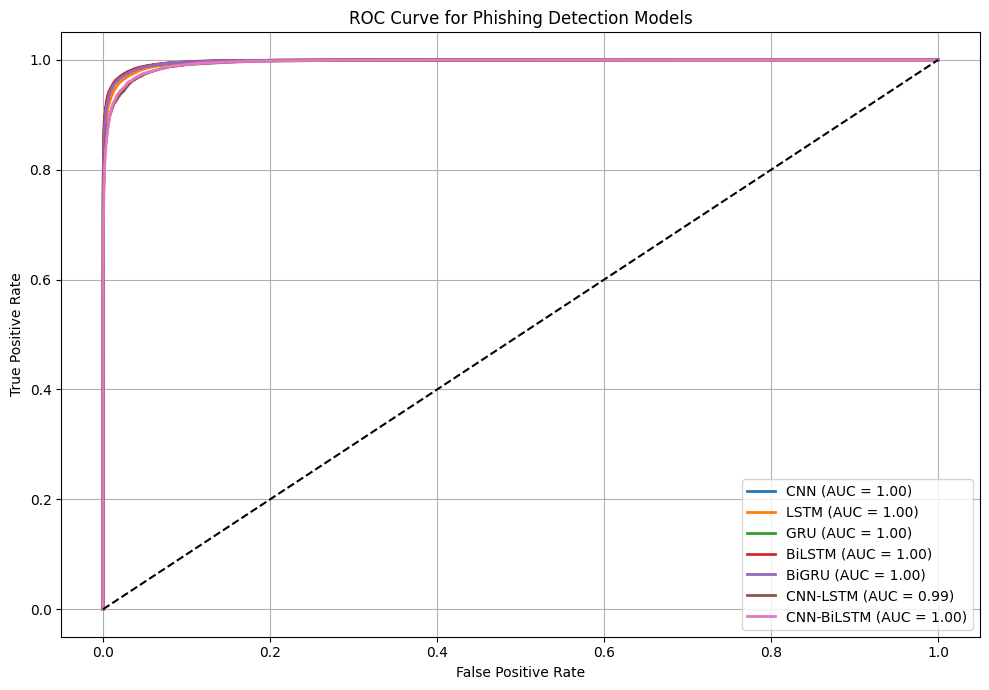

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Optional: Convert y_test to flat array if it's one-hot encoded
if y_test.ndim > 1:
    y_test = y_test.argmax(axis=1)

plt.figure(figsize=(10, 7))

model_predictions = {
    "CNN": cnn_model.predict(X_test),
    "LSTM": lstm_model.predict(X_test),
    "GRU": gru_model.predict(X_test),
    "BiLSTM": bilstm_model.predict(X_test),
    "BiGRU": bigru_model.predict(X_test),
    "CNN-LSTM": cnn_lstm_model.predict(X_test),
    "CNN-BiLSTM": cnn_bilstm_model.predict(X_test)
}

for name, y_pred in model_predictions.items():
    # If shape is (n_samples, 1), use .ravel(); if (n_samples, 2), use [:,1]
    y_score = y_pred.ravel()
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Phishing Detection Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model_predictions = {
    "CNN": cnn_model.predict(X_test),
    "LSTM": lstm_model.predict(X_test),
    "GRU": gru_model.predict(X_test),
    "BiLSTM": bilstm_model.predict(X_test),
    "BiGRU": bigru_model.predict(X_test),
    "CNN-LSTM": cnn_lstm_model.predict(X_test),
    "CNN-BiLSTM": cnn_bilstm_model.predict(X_test)
}

2875/2875 [==============================] - 87s 30ms/step


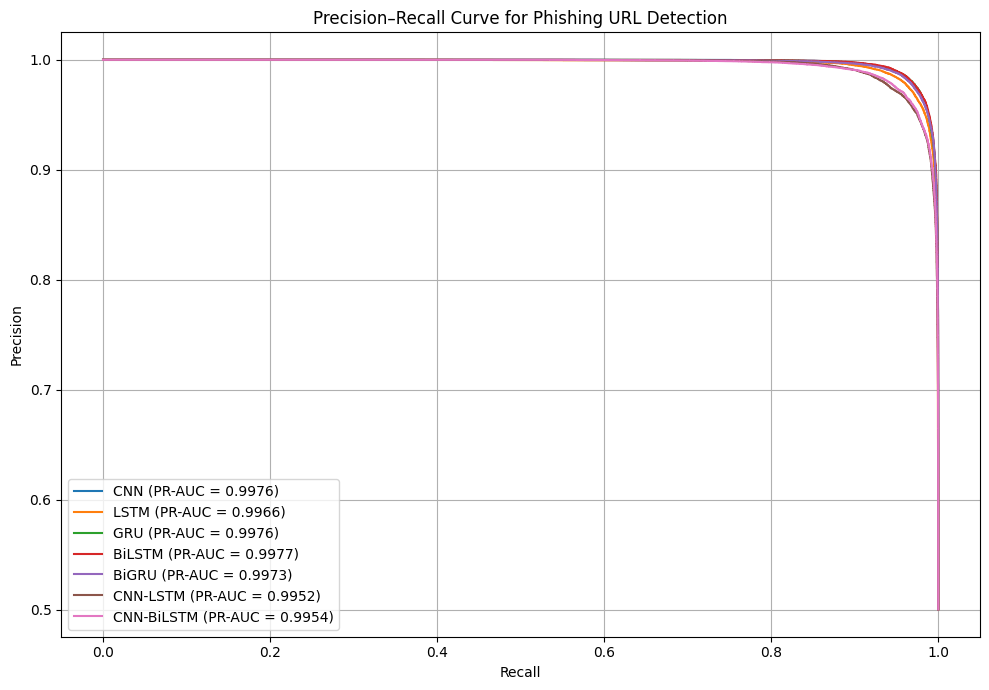

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
plt.figure(figsize=(10, 7))

for model_name, y_probs in model_predictions.items():
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (PR-AUC = {pr_auc:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve for Phishing URL Detection')
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("pr_curve_comparison.png", dpi=300)
plt.show()


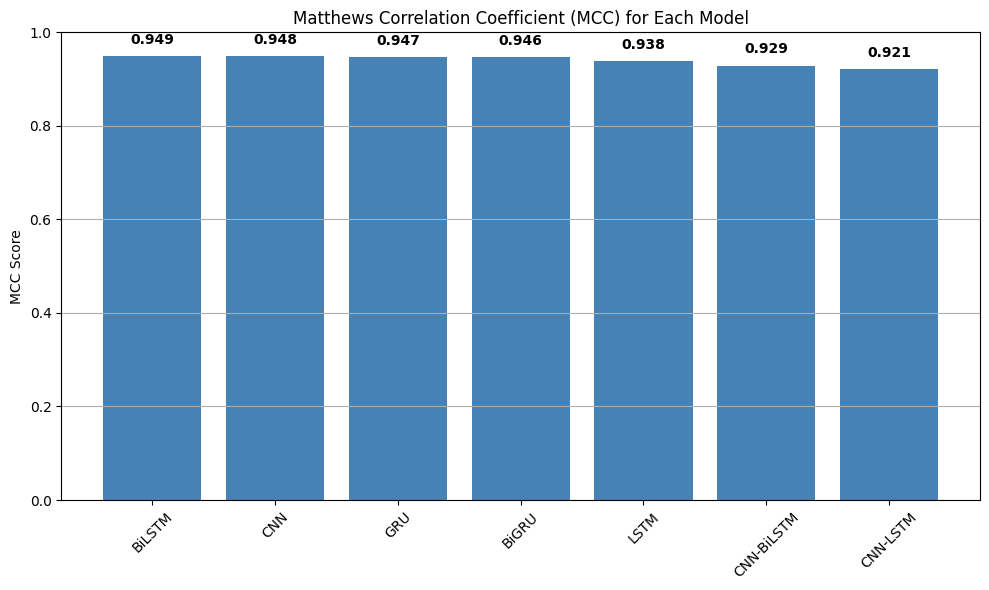

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

# Calculate MCC scores
mcc_scores = []
for name, y_pred in model_predictions.items():
    y_pred_class = (y_pred > 0.5).astype("int32").ravel()
    mcc = matthews_corrcoef(y_test, y_pred_class)
    mcc_scores.append((name, mcc))

# Sort scores by MCC descending
mcc_scores.sort(key=lambda x: x[1], reverse=True)
names, values = zip(*mcc_scores)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(names, values, color='steelblue')
plt.ylabel("MCC Score")
plt.title("Matthews Correlation Coefficient (MCC) for Each Model")
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.grid(axis='y')

# Annotate MCC values on bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{val:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## **Calculate Test Time**

In [ ]:
import time

# Load sample input
sample_url = X_test[:1]

In [ ]:
model_files = {
    'CNN': '/content/drive/MyDrive/models/change_simplecnn13_300_done_model.h5',
    'LSTM': '/content/drive/MyDrive/model_03/simple_lstm2.h5',
    'BiLSTM': '/content/drive/MyDrive/models/bilstm_4.h5',
    'GRU': '/content/drive/MyDrive/models/gru_3.h5',
    'BiGRU': '/content/drive/MyDrive/models/bigru_5.h5',
    'CNN-LSTM': '/content/drive/MyDrive/model_03/cnn_lstm_1.h5',
    'CNN-BiLSTM': '/content/drive/MyDrive/models/cnn_bilstm_6.h5'
}

In [ ]:
def measure_latency(model, input_sample, repeats=1000):
    start_time = time.time()
    for _ in range(repeats):
        _ = model.predict(input_sample, verbose=0)
    total_time = time.time() - start_time
    avg_latency_ms = (total_time / repeats) * 1000  # milliseconds
    throughput = repeats / total_time  # URLs per second
    return avg_latency_ms, throughput

In [ ]:
for name, filepath in model_files.items():
    model = load_model(filepath)
    latency, throughput = measure_latency(model, sample_url)
    print(f"{name} → Latency: {latency:.2f} ms/URL, Throughput: {throughput:.2f} URLs/sec")

CNN → Latency: 74.18 ms/URL, Throughput: 13.48 URLs/sec
LSTM → Latency: 115.31 ms/URL, Throughput: 8.67 URLs/sec
BiLSTM → Latency: 100.99 ms/URL, Throughput: 9.90 URLs/sec
GRU → Latency: 82.15 ms/URL, Throughput: 12.17 URLs/sec
BiGRU → Latency: 110.40 ms/URL, Throughput: 9.06 URLs/sec
CNN-LSTM → Latency: 82.53 ms/URL, Throughput: 12.12 URLs/sec
CNN-BiLSTM → Latency: 91.20 ms/URL, Throughput: 10.97 URLs/sec
